Dataset Link: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/data

## Importing Libraries

In [26]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
import matplotlib.pyplot as plt
import seaborn as sns

### Visualizing Single Audio

In [27]:
random_file_name = "genres_original/blues/blues.00000.wav"

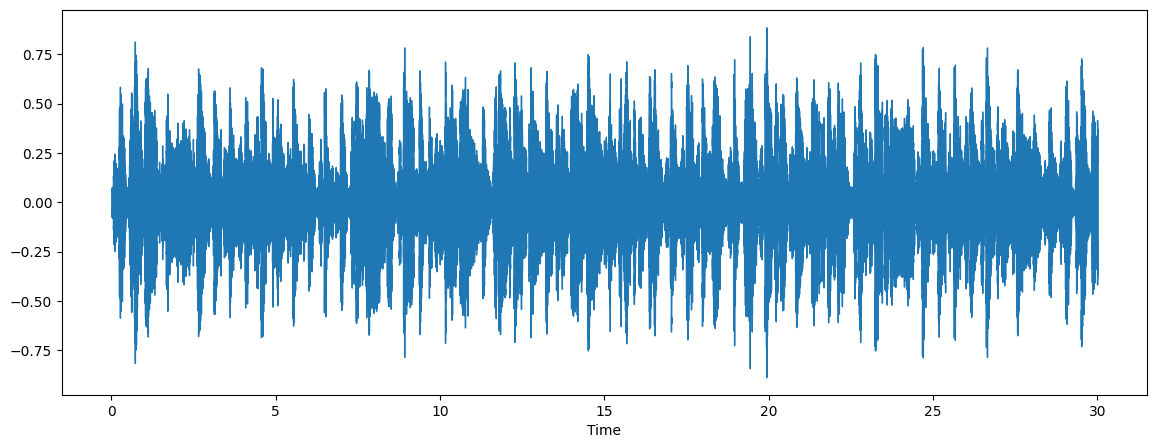

In [28]:
x, sr = librosa.load(random_file_name, sr=44100)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

#### Playing Sound

In [29]:
from IPython.display import Audio
Audio(data=x, rate=sr)

### Doing Visualization on chunks of audio

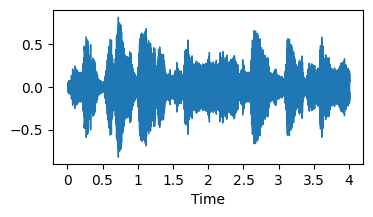

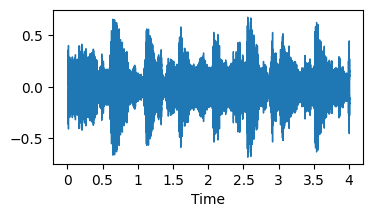

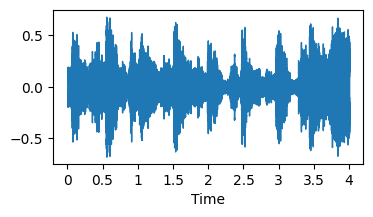

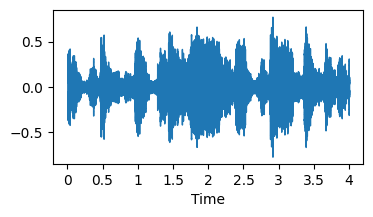

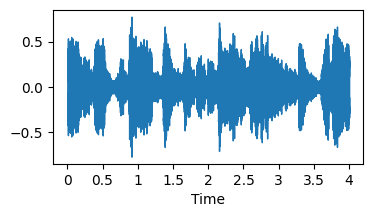

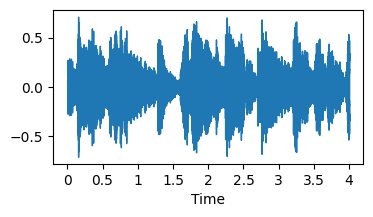

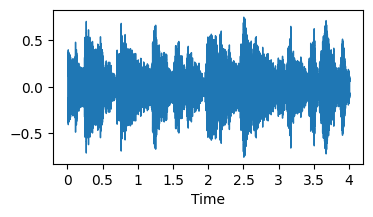

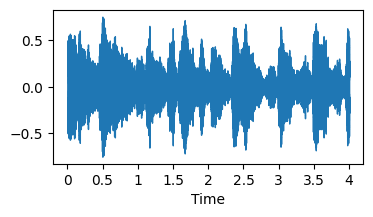

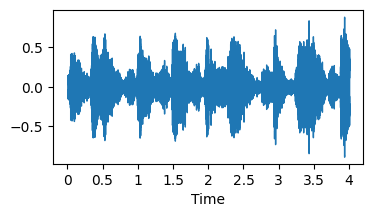

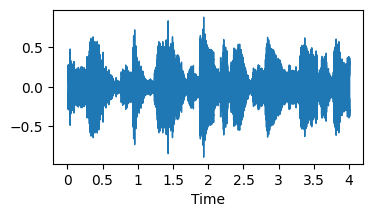

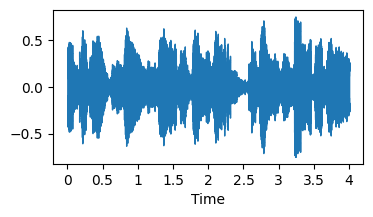

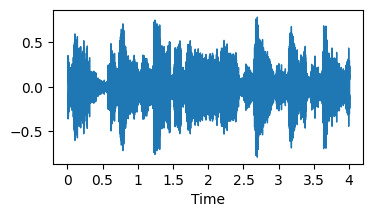

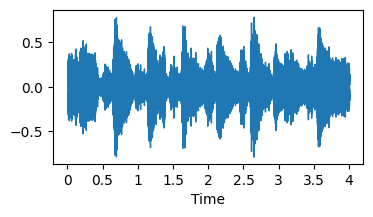

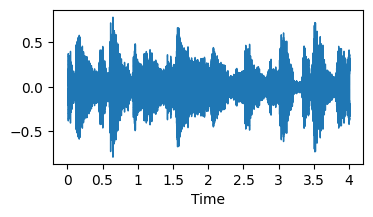

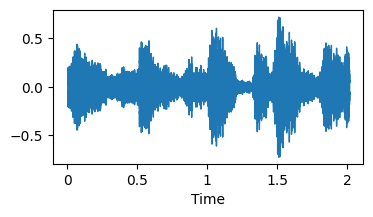

In [30]:
audio_path = "genres_original/blues/blues.00000.wav"
y, sr = librosa.load(audio_path, sr=None)  # sr=None to keep the original sampling rate

# Define the duration of each chunk and overlap
chunk_duration = 4  # seconds
overlap_duration = 2  # seconds

# Convert durations to samples
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# Calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# Iterate over each chunk
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples
    
    # Extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()
    

### Melspectrogram Visualization

In [31]:
#Plotting Melspectrogram of Entire audio
def plot_melspectrogram(y,sr):
    # Compute the spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    # Convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    # Visualize the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

In [32]:
def plot_melspectrogram_chunks(y,sr):
    # Define the duration of each chunk and overlap
    chunk_duration = 4  # seconds
    overlap_duration = 2  # seconds
    
    # Convert durations to samples
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    # Calculate the number of chunks
    num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
    
    # Iterate over each chunk
    for i in range(num_chunks):
        # Calculate start and end indices of the chunk
        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples
        
        # Extract the chunk of audio
        chunk = y[start:end]
        
        # Compute the Mel spectrogram for the chunk
        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
        print(mel_spectrogram.shape)
        spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
        # Visualize the spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.tight_layout()
        plt.show()

(128, 173)


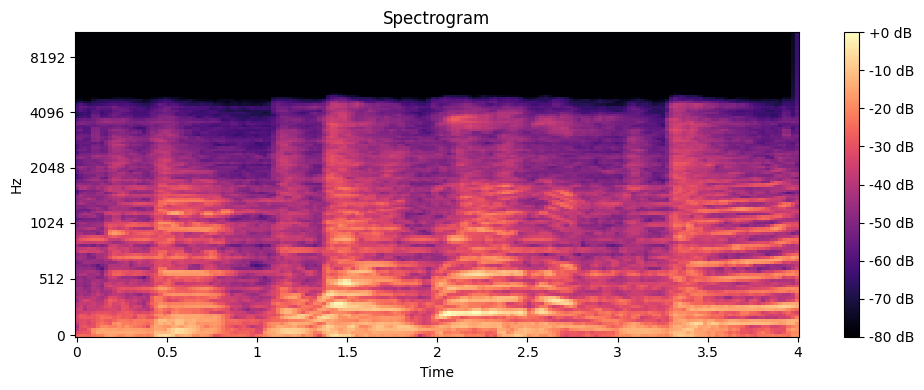

(128, 173)


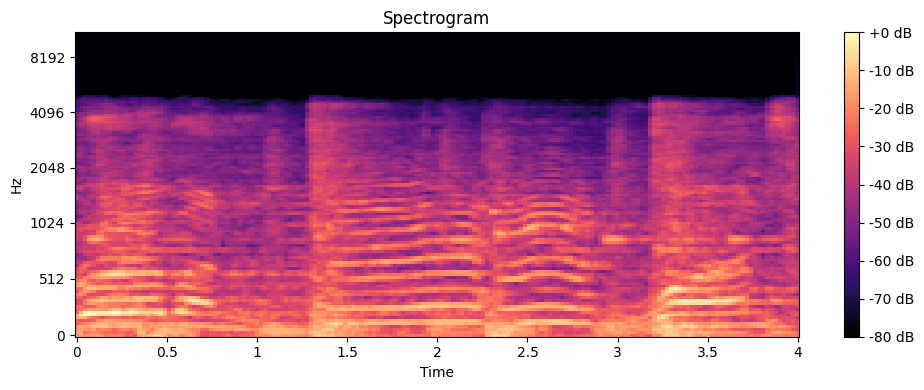

(128, 173)


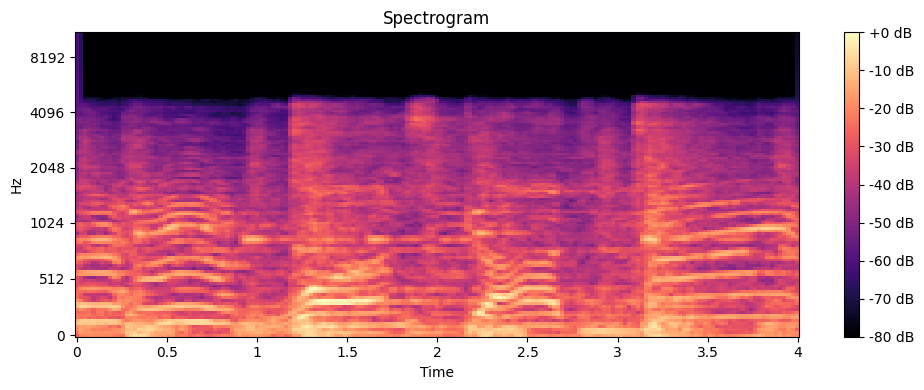

(128, 173)


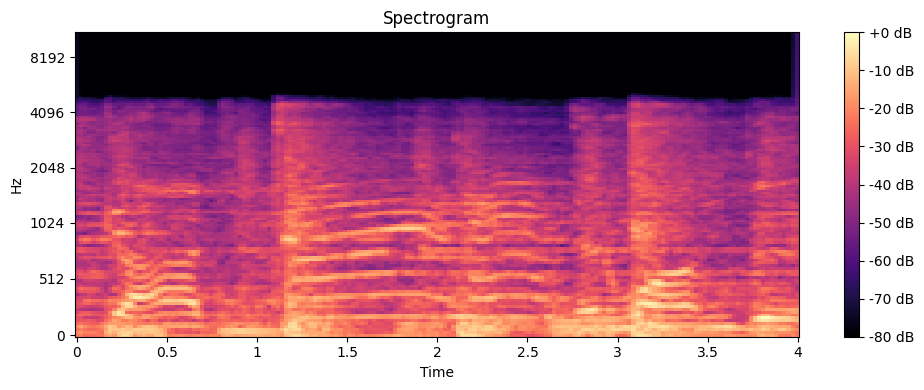

(128, 173)


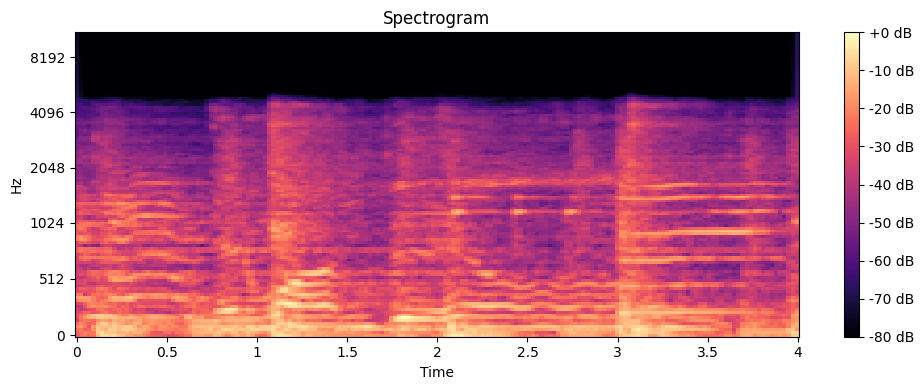

(128, 173)


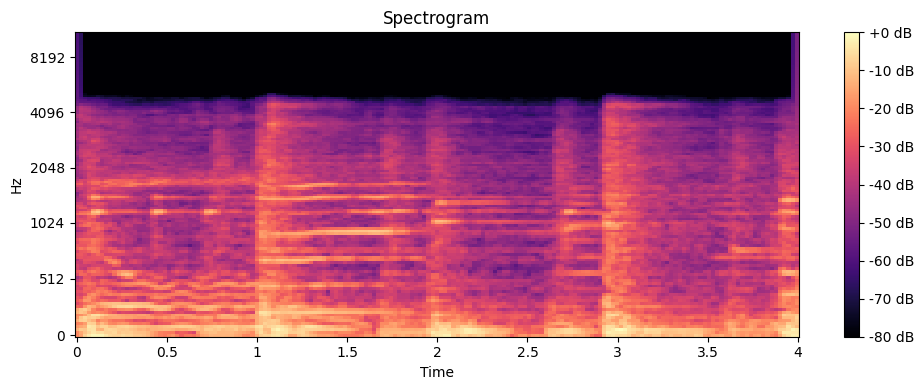

(128, 173)


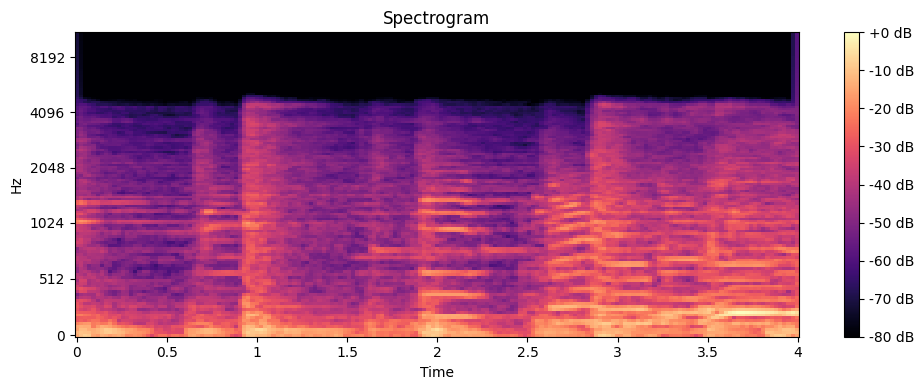

(128, 173)


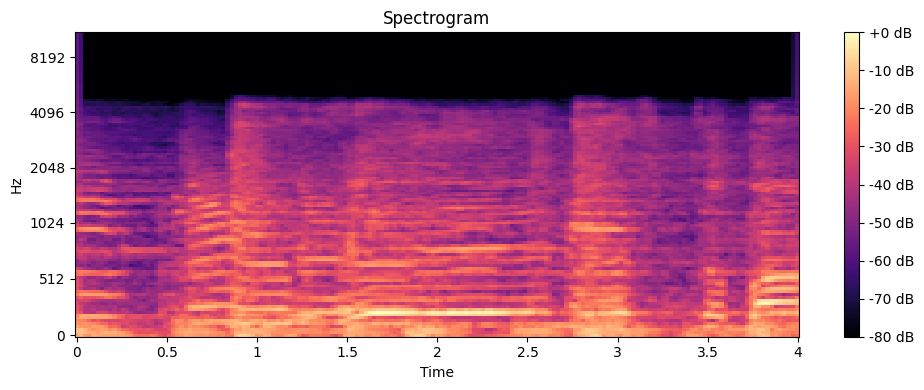

(128, 173)


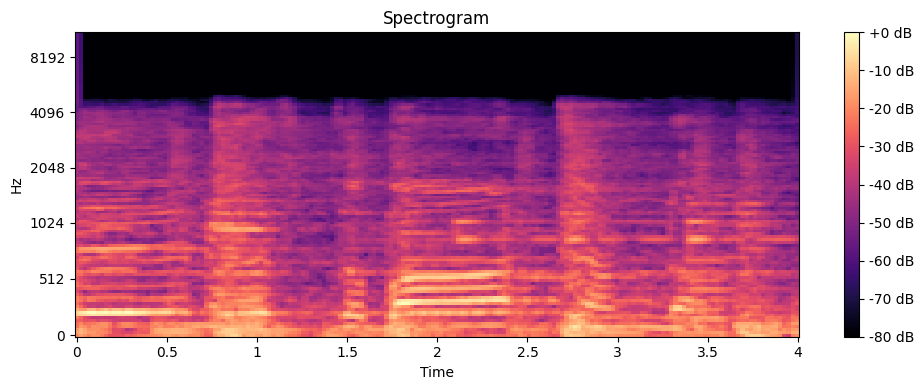

(128, 173)


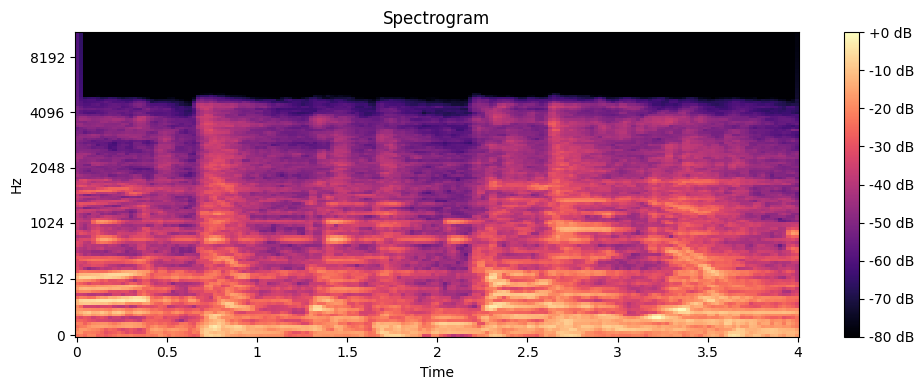

(128, 173)


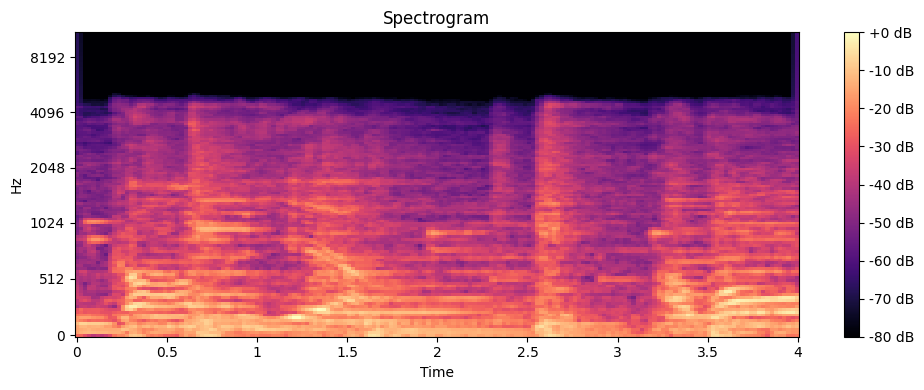

(128, 173)


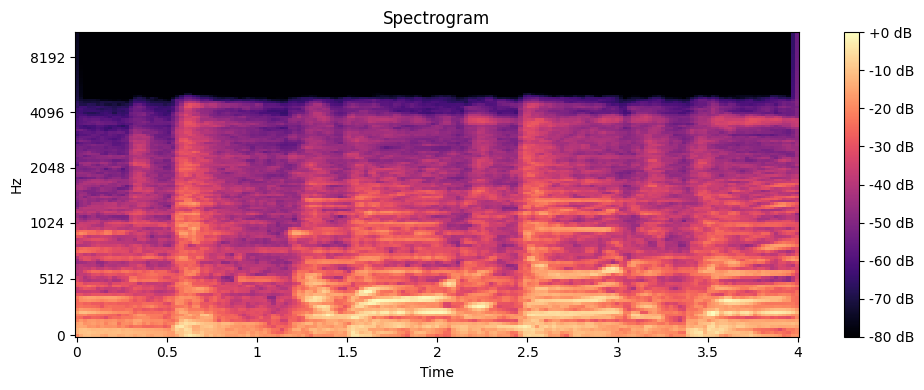

(128, 173)


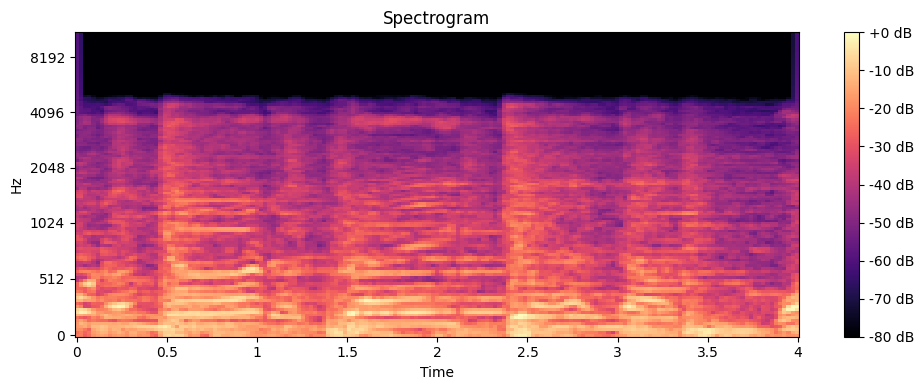

(128, 173)


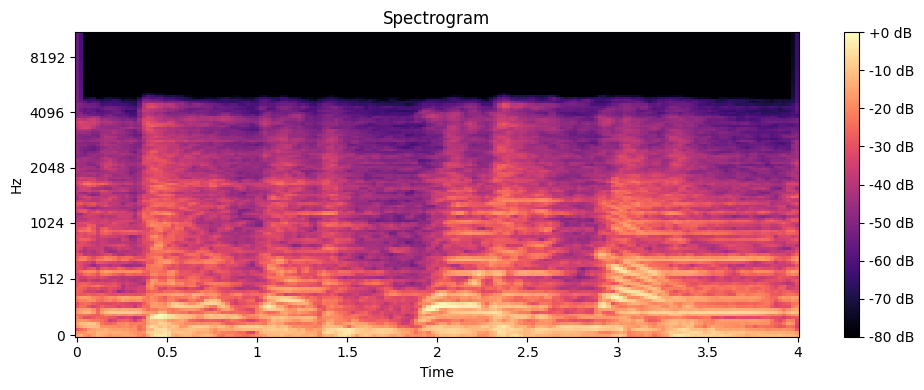

(128, 173)


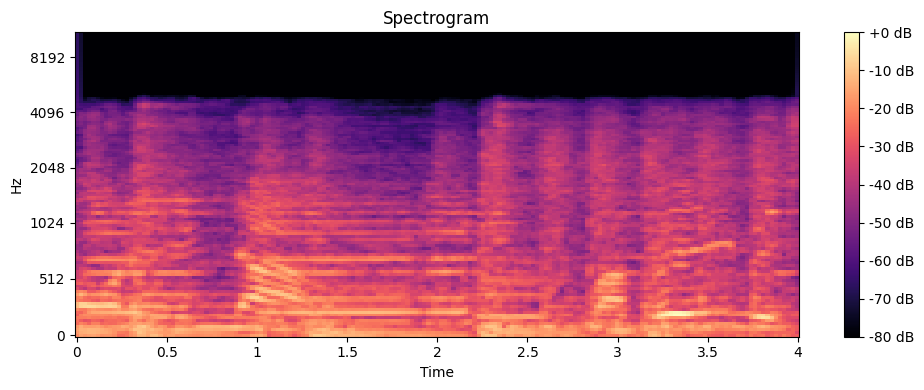

(128, 173)


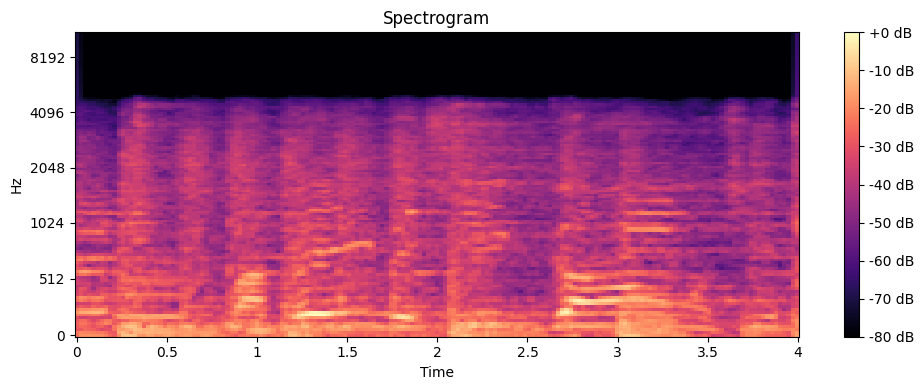

(128, 173)


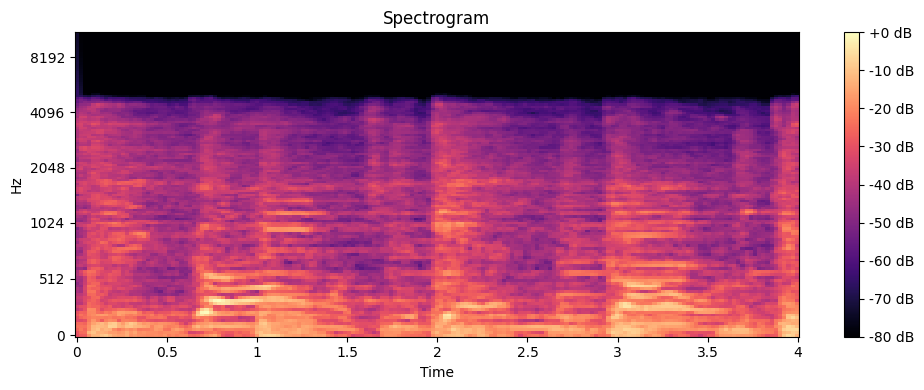

(128, 173)


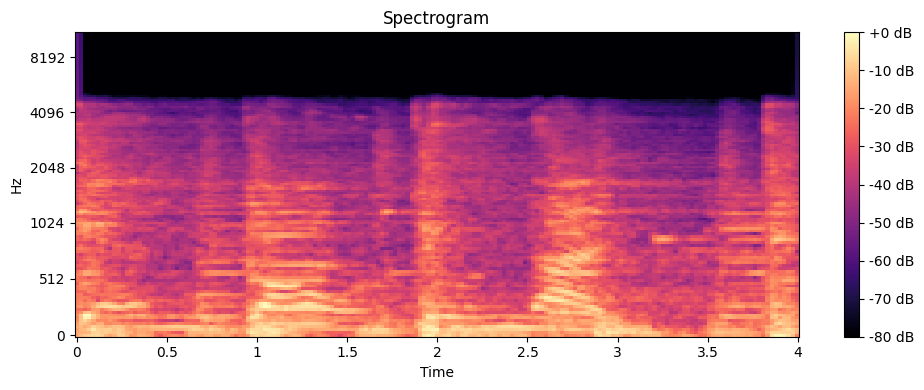

(128, 173)


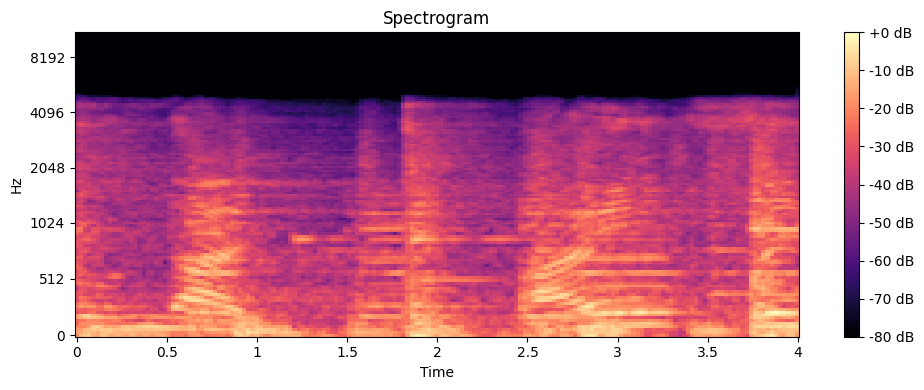

(128, 173)


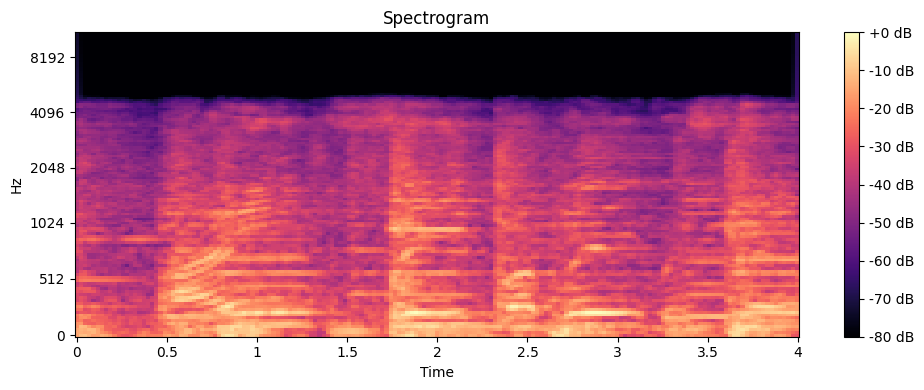

(128, 173)


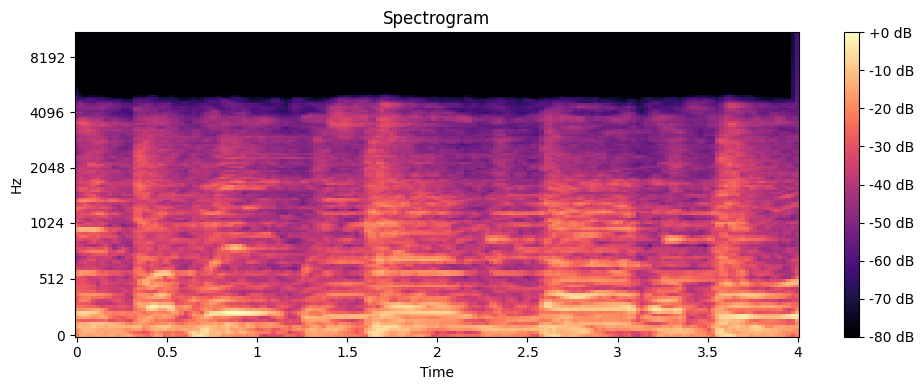

(128, 173)


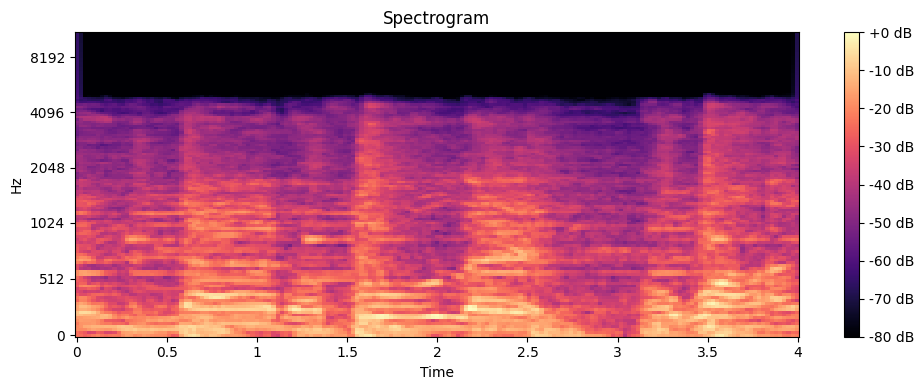

(128, 173)


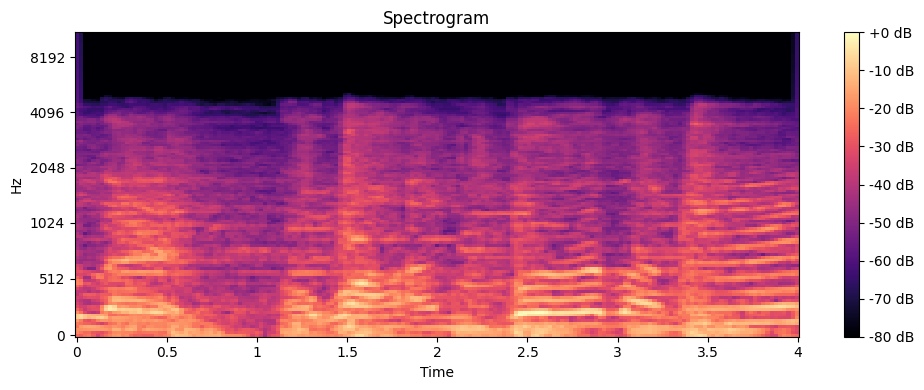

(128, 173)


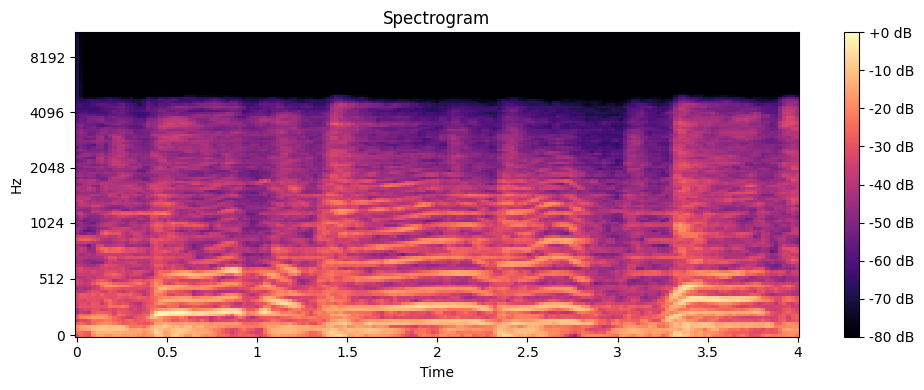

(128, 173)


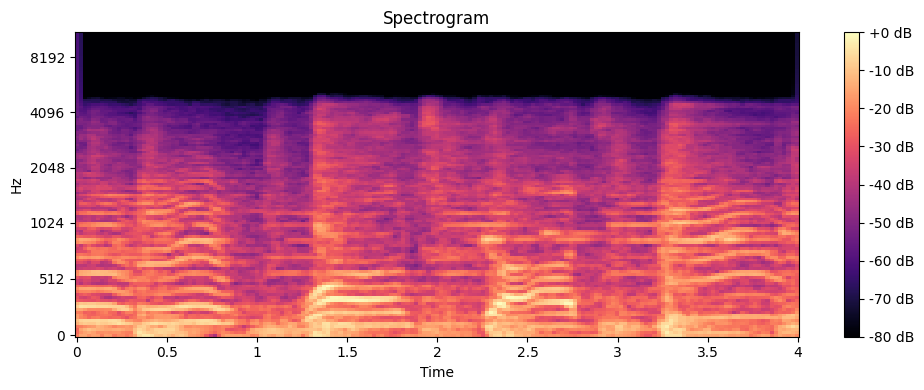

(128, 173)


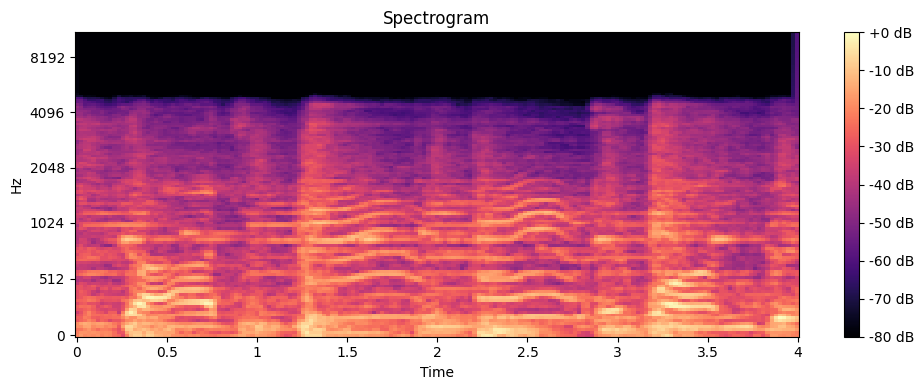

(128, 173)


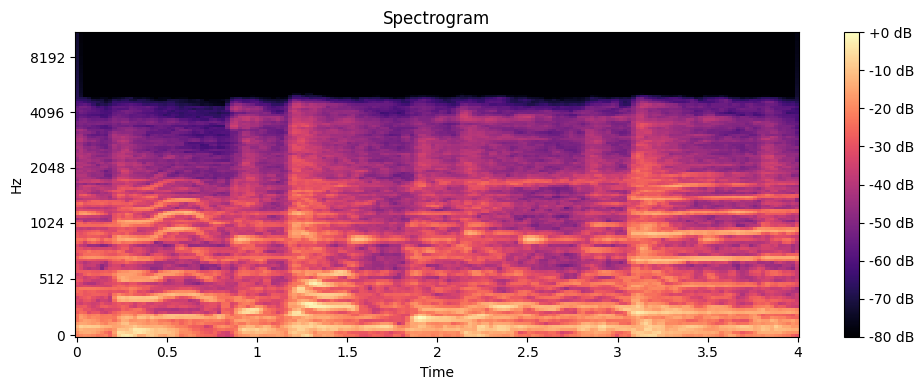

(128, 173)


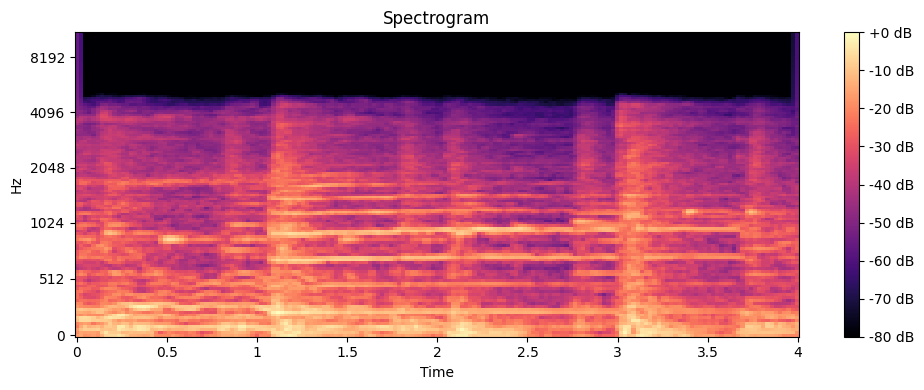

(128, 173)


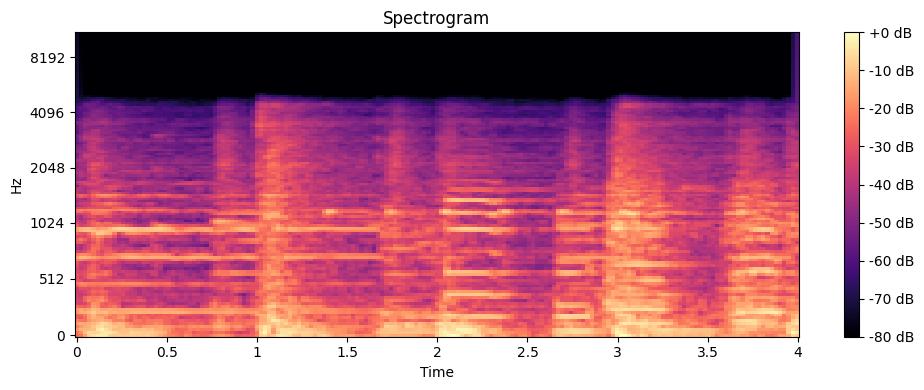

(128, 88)


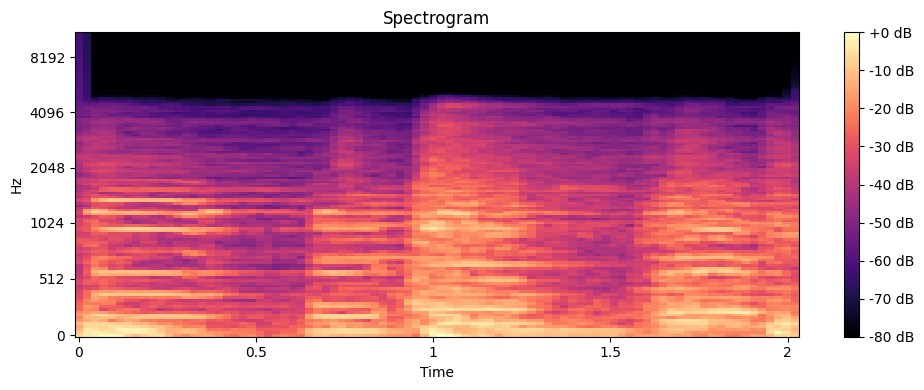

In [33]:
#Spectrogram of Audio chunks
plot_melspectrogram_chunks(y=x,sr=sr)

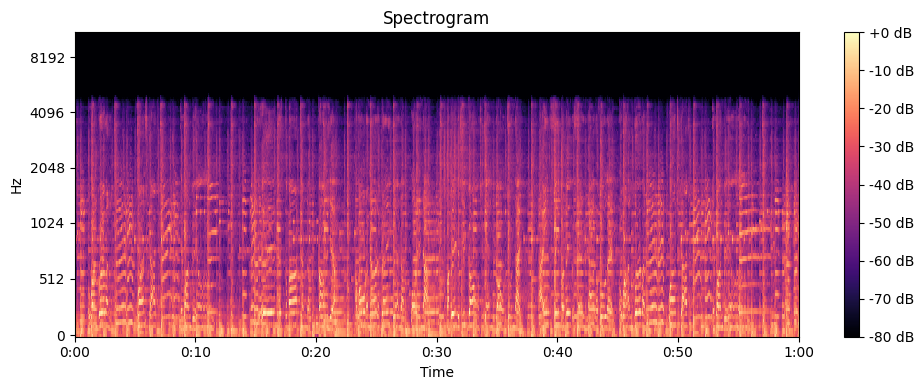

In [34]:
#Spectrogram of Entire audio
plot_melspectrogram(y=x,sr=sr)

### Data Preprocessing

In [35]:
# Define your folder structure
data_dir = './genres_original'
classes = ['blues', 'classical','country','disco','hiphop','metal','pop','reggae','rock']

In [39]:
# Load and preprocess audio data
def load_and_preprocess_data(data_dir, classes, target_shape=(150, 150)):
    data = []
    labels = []
    
    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                audio_data, sample_rate = librosa.load(file_path, sr=None)
                # Perform preprocessing (e.g., convert to Mel spectrogram and resize)
                # Define the duration of each chunk and overlap
                chunk_duration = 4  # seconds
                overlap_duration = 2  # seconds
                
                # Convert durations to samples
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                # Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
                
                # Iterate over each chunk
                for i in range(num_chunks):
                    # Calculate start and end indices of the chunk
                    start = i * (chunk_samples - overlap_samples)
                    end = start + chunk_samples
                    
                    # Extract the chunk of audio
                    chunk = audio_data[start:end]
                    
                    # Compute the Mel spectrogram for the chunk
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
                    
                #mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    
    return np.array(data), np.array(labels)

In [40]:
# Split data into training and testing sets
data, labels = load_and_preprocess_data(data_dir, classes)
#print("\nData:",data,"\nlabel",labels)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [41]:
data.shape

(13490, 150, 150, 1)

In [42]:
labels.shape

(13490,)

In [43]:
labels

array([0, 0, 0, ..., 8, 8, 8], shape=(13490,))

In [44]:
labels = to_categorical(labels, num_classes=len(classes))  # Convert labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(13490, 9))

In [45]:
labels.shape

(13490, 9)

In [46]:
data.shape

(13490, 150, 150, 1)

### Splitting Dataset into Training and Test set

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

## Building Model

In [48]:
model = tf.keras.models.Sequential()

In [49]:
X_train[0].shape

(150, 150, 1)

In [50]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

c:\Users\Admin\Desktop\DS\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [52]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [53]:
model.add(tf.keras.layers.Dropout(0.3))

In [54]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [55]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [56]:
model.add(Dropout(0.3))

In [57]:
model.add(Flatten())

In [58]:
model.add(Dense(units=1200,activation='relu'))

In [59]:
model.add(Dropout(0.45))

In [60]:
#Output Layer
model.add(Dense(units=len(classes),activation='softmax'))

In [61]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 74, 74, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 36, 36, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 17, 17, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1200)           │     2,458,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │        10,809 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,181,257 (27.39 MB)

 Trainable params: 7,181,257 (27.39 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
from tensorflow.keras.optimizers import Adam


In [64]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
X_train.shape,y_train.shape

((10792, 150, 150, 1), (10792, 9))

In [66]:
# Train the model
training_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 965s 3s/step - accuracy: 0.2914 - loss: 1.9035 - val_accuracy: 0.4774 - val_loss: 1.5484
Epoch 2/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 1003s 3s/step - accuracy: 0.5240 - loss: 1.3531 - val_accuracy: 0.5448 - val_loss: 1.2598
Epoch 3/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 811s 2s/step - accuracy: 0.6214 - loss: 1.0853 - val_accuracy: 0.6357 - val_loss: 0.9837
Epoch 4/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 765s 2s/step - accuracy: 0.6823 - loss: 0.9225 - val_accuracy: 0.6612 - val_loss: 0.9341
Epoch 5/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 830s 2s/step - accuracy: 0.7295 - loss: 0.7853 - val_accuracy: 0.6857 - val_loss: 0.8606
Epoch 6/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 752s 2s/step - accuracy: 0.7671 - loss: 0.6731 - val_accuracy: 0.7543 - val_loss: 0.7234
Epoch 7/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 795s 2s/step - accuracy: 0.8005 - loss: 0.5771 - val_accuracy: 0.7950 - val_loss: 0.6133
Epoch 8/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 805s 2s/step - accuracy: 0.8315 - loss: 0.4916 - val_acc

In [68]:
model.save("Trained_model.keras") #Mac
# model.save("Trained_model.h5") #Windows

In [69]:
training_history.history

{'accuracy': [0.2914195656776428,
  0.5239992737770081,
  0.6213862299919128,
  0.6822646260261536,
  0.7295218706130981,
  0.7671423554420471,
  0.8005003929138184,
  0.831541895866394,
  0.8544291853904724,
  0.8794477581977844,
  0.8962194323539734,
  0.910025954246521,
  0.9270756244659424,
  0.9274462461471558,
  0.9452372193336487,
  0.9475537538528442,
  0.9587657451629639,
  0.9580244421958923,
  0.9672905802726746,
  0.963398814201355,
  0.9709043502807617,
  0.9671052694320679,
  0.9706264138221741,
  0.9761860370635986,
  0.9730355739593506,
  0.9819310307502747,
  0.9787805676460266,
  0.9831356406211853,
  0.9825797080993652,
  0.9866567850112915],
 'loss': [1.9034970998764038,
  1.3530699014663696,
  1.085294246673584,
  0.9224979281425476,
  0.7852762341499329,
  0.6731090545654297,
  0.5770668387413025,
  0.49159935116767883,
  0.42151567339897156,
  0.3446294665336609,
  0.30525442957878113,
  0.26226770877838135,
  0.21712234616279602,
  0.2030167132616043,
  0.159425

In [70]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

## Model Evaluation

In [71]:
##Model Evaluation on Training set
train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(train_accuracy[1])

0.9908265471458435


In [72]:
##Model Evaluation on Test set
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.889177143573761


## Accuracy and Loss Visualization

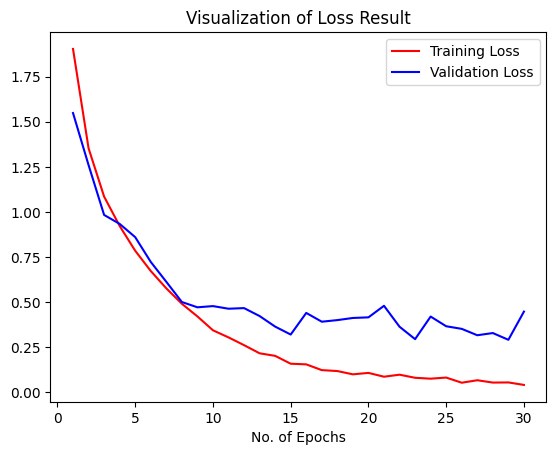

In [73]:
#Visualization of Loss
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['loss'],color='red',label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

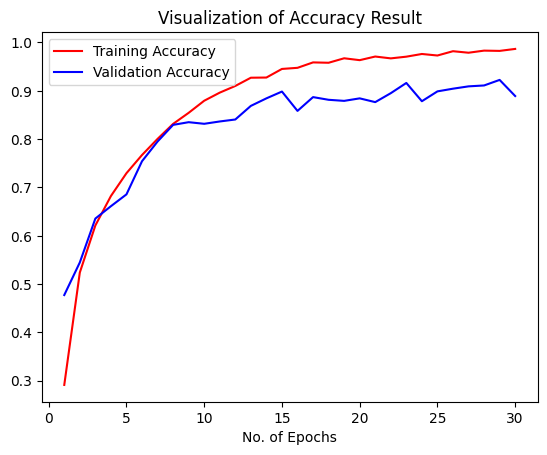

In [74]:
#Accuracy Visualization
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Precision, Recall, Confusion Metrics calculation

In [75]:
y_pred = model.predict(X_test)
y_pred

85/85 ━━━━━━━━━━━━━━━━━━━━ 46s 538ms/step


array([[2.2103211e-04, 1.9497684e-06, 9.9964571e-01, ..., 1.4628264e-06,
        4.8339381e-05, 8.1579055e-05],
       [9.6188921e-01, 3.8261863e-10, 1.3357864e-09, ..., 2.1318776e-10,
        3.7713248e-02, 6.3815983e-06],
       [2.5006237e-05, 4.5253656e-10, 9.9997401e-01, ..., 3.7085209e-12,
        9.4456743e-07, 4.1903609e-09],
       ...,
       [4.8311494e-11, 6.7852651e-10, 1.4464528e-10, ..., 9.9989474e-01,
        2.3466599e-07, 7.4127954e-08],
       [1.5976577e-05, 3.1219301e-08, 9.9998379e-01, ..., 7.3368436e-09,
        9.6749261e-08, 1.0032508e-07],
       [1.2681322e-04, 5.2071889e-09, 1.7692802e-08, ..., 7.7516995e-07,
        5.8050796e-07, 3.0145985e-03]], shape=(2698, 9), dtype=float32)

In [76]:
y_pred.shape

(2698, 9)

In [77]:
y_test.shape

(2698, 9)

In [78]:
predicted_categories = np.argmax(y_pred, axis=1)
predicted_categories

array([2, 0, 2, ..., 6, 2, 5], shape=(2698,))

In [79]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(2698, 9))

In [80]:
true_categories = np.argmax(y_test, axis=1)
true_categories

array([2, 0, 2, ..., 6, 2, 5], shape=(2698,))

In [81]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'metal',
 'pop',
 'reggae',
 'rock']

In [82]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.77      0.98      0.87       316
   classical       0.96      0.98      0.97       291
     country       0.94      0.74      0.83       326
       disco       0.88      0.95      0.91       289
      hiphop       0.87      0.95      0.91       295
       metal       0.96      0.86      0.90       298
         pop       0.97      0.87      0.92       318
      reggae       0.96      0.88      0.92       273
        rock       0.76      0.80      0.78       292

    accuracy                           0.89      2698
   macro avg       0.90      0.89      0.89      2698
weighted avg       0.90      0.89      0.89      2698



## Confusion Matrix Visualization

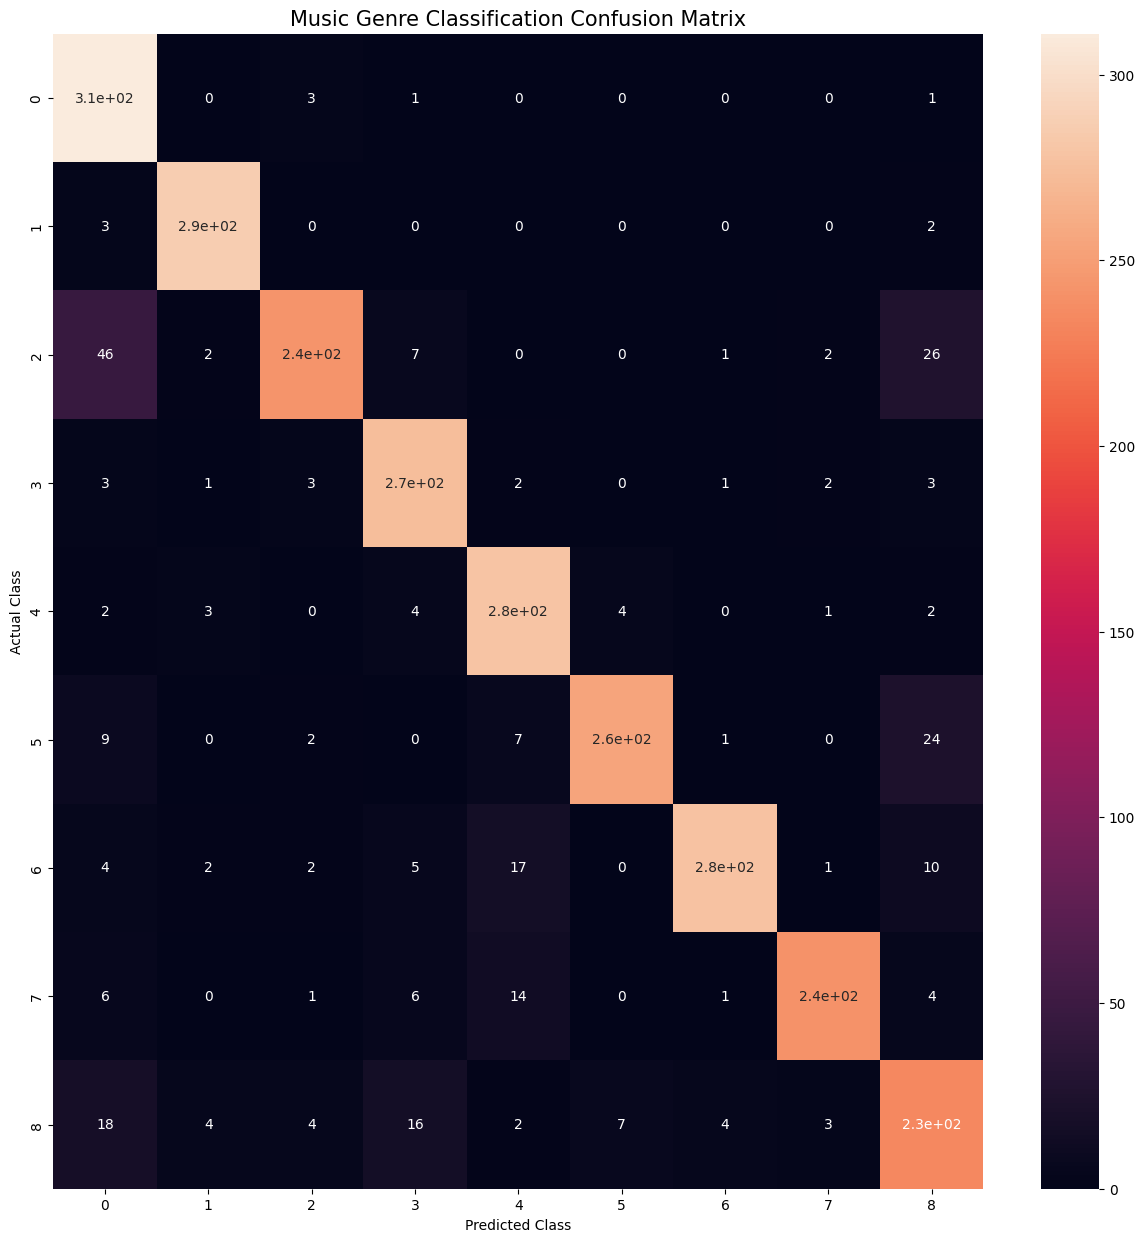

In [83]:
plt.figure(figsize=(15, 15))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 10)
plt.ylabel('Actual Class',fontsize = 10)
plt.title('Music Genre Classification Confusion Matrix',fontsize = 15)
plt.show()